In [1]:
# 데이터셋 load

from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

In [2]:
# data와 target 받기

df_x = diabetes.data
df_y = diabetes.target

# 데이터 모양 파악하기
print(df_x.shape)
print(df_y.shape)

(442, 10)
(442,)


In [3]:
# df_x, df_y numpy array로 변환

import numpy as np

X = np.array(df_x)
y = np.array(df_y)

print(type(X))
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [4]:
# train data와 test data로 나눠주기
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(353, 10)
(89, 10)
(353,)
(89,)


In [5]:
# W, b 정의

W = np.random.rand(10)
b = np.random.rand()

print(W,b)

[0.8398801  0.70291938 0.63615607 0.47158142 0.86209881 0.4175516
 0.16077093 0.80271259 0.85584764 0.92848623] 0.7764813026988325


In [6]:
# 모델 준비

def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

In [7]:
# 손실함수 loss 정의

def MSE(a, b):
    mse = ((a - b) ** 2).mean()
    return mse

def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

In [8]:
# gradient 함수 구현

def gradient(X, W, b, y):
    # N은 데이터 포인트의 개수
    N = len(y)
    
    # y_pred 준비
    y_pred = model(X, W, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db


dW, db = gradient(X, W, b, y)
print("dW:", dW)
print("db:", db)

dW: [-1.36636185 -0.30805251 -4.28531632 -3.22354536 -1.53988398 -1.2625142
  2.88431281 -3.13914268 -4.13140284 -2.78901588]
db: -302.7140057203942


In [9]:
# 하이퍼 파라미터(학습률) 설정하기

LR = 0.005


# 모델 학습

losses = []

for i in range(1, 50001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LR * dW
    b -= LR * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 10 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 10 : Loss 25191.0463
Iteration 20 : Loss 21702.0767
Iteration 30 : Loss 18847.7175
Iteration 40 : Loss 16512.4102
Iteration 50 : Loss 14601.6390
Iteration 60 : Loss 13038.0990
Iteration 70 : Loss 11758.5622
Iteration 80 : Loss 10711.3140
Iteration 90 : Loss 9854.0568
Iteration 100 : Loss 9152.1954
Iteration 110 : Loss 8577.4339
Iteration 120 : Loss 8106.6293
Iteration 130 : Loss 7720.8525
Iteration 140 : Loss 7404.6214
Iteration 150 : Loss 7145.2734
Iteration 160 : Loss 6932.4512
Iteration 170 : Loss 6757.6840
Iteration 180 : Loss 6614.0431
Iteration 190 : Loss 6495.8617
Iteration 200 : Loss 6398.5049
Iteration 210 : Loss 6318.1817
Iteration 220 : Loss 6251.7914
Iteration 230 : Loss 6196.7981
Iteration 240 : Loss 6151.1275
Iteration 250 : Loss 6113.0830
Iteration 260 : Loss 6081.2771
Iteration 270 : Loss 6054.5748
Iteration 280 : Loss 6032.0479
Iteration 290 : Loss 6012.9371
Iteration 300 : Loss 5996.6215
Iteration 310 : Loss 5982.5932
Iteration 320 : Loss 5970.4367
Iteration

In [10]:
# test 데이터에 대한 성능 확인

prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

2882.2121412105957

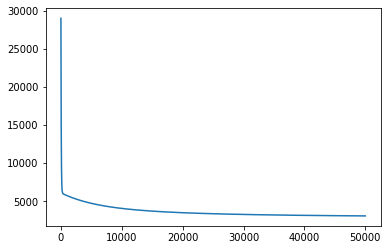

In [11]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.show()

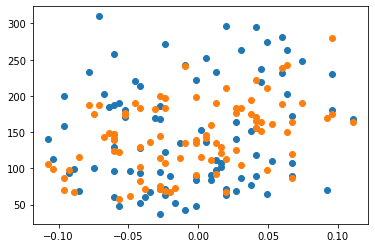

In [12]:
plt.scatter(X_test[:,0], y_test)
plt.scatter(X_test[:,0], prediction)
plt.show()